In [18]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# drive.mount('/content/gdrive')

### Importando e explorando os dados

In [2]:
data = pd.read_csv('../data/output_densenet_train.csv', sep=',')
col_names=[]
for i in range(len(data.columns)):
  col_names.append(str(i))
print(len(data.columns))
# print(col_names)

data = pd.read_csv('../data/output_densenet_train.csv', sep=',', names=col_names)

##Importando e explorando os dados

## TREINO
data_train = pd.read_csv('../data/output_densenet_train.csv', sep=',')
col_names=[]
for i in range(len(data_train.columns)):
  col_names.append(str(i))
print(len(data_train.columns))
# print(col_names)

data_train = pd.read_csv('../data/output_densenet_train.csv', names=col_names)

## VALIDAÇÃO
data_val = pd.read_csv('../data/output_densenet_val.csv', sep=',')
col_names=[]
for i in range(len(data_val.columns)):
  col_names.append(str(i))
print(len(data_val.columns))
# print(col_names)

data_val = pd.read_csv('../data/output_densenet_val.csv', names=col_names)

## TESTE
data_test = pd.read_csv('../data/output_densenet_test.csv', sep=',')
col_names=[]
for i in range(len(data_test.columns)):
  col_names.append(str(i))
print(len(data_test.columns))
# print(col_names)

data_test = pd.read_csv('../data/output_densenet_test.csv', names=col_names)


# Visualização dos dados 
print(data_train.shape)
data_train.head(10)

1025
1025
1025
1025
(4208, 1025)


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0.000944,0.002661,0.012668,0.003094,0.038160,0.868616,0.000455,0.001779,0.285878,...,0.285219,5.397420,0.145374,1.540241,1.922522,4.256811,0.017882,0.100336,1.367321,1.647147
1,0,0.000131,0.000930,0.006151,0.004051,0.080557,0.832400,0.000479,0.001071,0.118720,...,0.067933,1.863616,0.000000,0.681680,2.798108,4.224206,0.005430,2.330088,0.175864,0.714172
2,1,0.001063,0.002809,0.005221,0.005379,0.036074,1.305328,0.000706,0.002928,0.286010,...,0.000000,1.163371,1.494781,1.508267,1.488753,0.070286,2.081975,2.731160,0.000000,0.112964
3,1,0.001046,0.001331,0.002944,0.003391,0.026359,0.944276,0.000494,0.001258,0.116351,...,0.017204,0.034326,2.761541,2.596450,0.585777,0.207722,0.796570,4.714148,0.000000,0.895667
4,1,0.000906,0.001818,0.002844,0.001040,0.045158,0.312737,0.000319,0.000702,0.049549,...,0.003943,0.148177,1.537525,0.537371,0.091987,0.209803,0.577082,2.098766,0.000262,0.153663
5,1,0.000534,0.002330,0.001346,0.003003,0.099872,0.826041,0.000188,0.001511,0.264414,...,0.000000,0.508468,1.111710,2.523074,0.492273,0.566197,0.761997,0.893874,0.000000,0.330816
6,0,0.000300,0.001719,0.010609,0.003426,0.029651,1.751167,0.001050,0.002291,0.128348,...,0.143511,8.584998,0.019641,0.725460,4.095777,2.140120,0.244791,3.505011,1.076491,1.258306
7,0,0.001578,0.002271,0.006730,0.004696,0.065232,0.992044,0.000518,0.003023,0.270604,...,0.006874,2.401649,0.047849,2.435232,2.052891,10.094367,0.169006,1.028523,4.196788,6.434321
8,0,0.000499,0.000767,0.011728,0.002855,0.021791,0.949297,0.000633,0.000873,0.131022,...,0.006379,4.197504,0.000698,0.551510,8.077971,9.600934,0.000000,3.157512,1.998450,2.382918
9,0,0.001266,0.002901,0.008471,0.005212,0.020817,1.171808,0.000412,0.002299,0.175798,...,0.057076,4.441793,0.111138,1.338798,4.465654,8.114120,0.238471,1.631858,1.369252,2.013452


Iremos plotar abaixo a distribuição das classes em histograma

(array([1943., 1732.,  400.,   66.,   34.,   25.,    8.]),
 array([2.10235160e-05, 7.08203699e-04, 1.39538388e-03, 2.08256407e-03,
        2.76974425e-03, 3.45692443e-03, 4.14410462e-03, 4.83128480e-03]),
 <BarContainer object of 7 artists>)

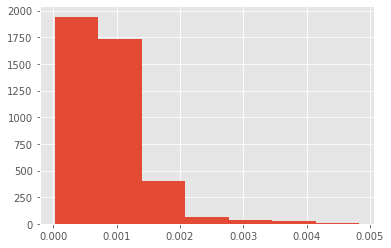

In [3]:
plt.style.use('ggplot')
plt.hist(data['1'], bins=7)

Pela descrição do dataset, o tipo de vidro é de 1 a 7, porém não existem dados para o tipo 4


In [4]:
data.describe() 

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
count,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,...,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000
mean,0.405894,0.000869,0.001961,0.007074,0.003339,0.040528,0.854632,0.000472,0.001877,0.208543,...,0.064654,2.591236,0.858465,1.436197,2.950392,3.944842,0.464438,2.962545,1.175007,1.846260
std,0.491122,0.000562,0.001050,0.002859,0.001238,0.027518,0.266992,0.000198,0.000882,0.100822,...,0.120520,2.176542,1.126135,1.307931,2.704516,4.025151,0.531480,1.788376,1.388432,1.450029
min,0.000000,0.000021,0.000000,0.000115,0.000060,0.000000,0.111805,0.000010,0.000037,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045352,0.000000,0.000000
25%,0.000000,0.000503,0.001212,0.005110,0.002503,0.021248,0.703340,0.000331,0.001220,0.130956,...,0.000000,0.626691,0.073383,0.522168,0.763879,0.937091,0.073120,1.702761,0.188997,0.812646
50%,0.000000,0.000749,0.001833,0.007140,0.003501,0.034580,0.852373,0.000457,0.001771,0.199411,...,0.013083,2.206358,0.333217,1.027820,2.110451,2.607415,0.284781,2.597412,0.737923,1.447344
75%,1.000000,0.001089,0.002593,0.009035,0.004242,0.052929,1.011267,0.000591,0.002430,0.279145,...,0.072878,4.127178,1.256395,1.919744,4.636252,5.653852,0.657606,3.884687,1.609906,2.492018
max,1.000000,0.004831,0.007329,0.017705,0.007250,0.322093,5.388392,0.001258,0.005241,0.610509,...,1.176365,11.313713,7.695866,8.874668,15.082007,27.413174,3.965734,15.996740,10.658191,12.186568


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208 entries, 0 to 4207
Columns: 1025 entries, 0 to 1024
dtypes: float64(1024), int64(1)
memory usage: 32.9 MB


Pelas informações do dataset vemos que não existe nenhum dado nulo na base, portanto não precisamos realizar tratamento de nulos

Iremos plotar os gráficos dos pares de variáveis e da sua distribuição individual

In [6]:
variaveis_pertinentes = data
# sns.set(style="ticks", color_codes=True)
# plt.style.use('ggplot')
# # Plotando a distribuição em pares das variáveis pertinentes e seus histogramas
# plt.figure(figsize=(8,8))
# sns.pairplot(variaveis_pertinentes,palette='coolwarm', corner=True, kind="reg", diag_kind="kde")
# plt.show()


Analisando os gráficos as únicas variáveis que parecem ter correlação visivel uma com a outra são a RI e a Ca. Também é possível concluir que a distribuição de todas as variáveis segue um padrão de ter picos em poucos valores e ocorrência baixa em todos os outros, menos a variável Ba, que possui vários picos e vales.

### Matriz de correlação

In [7]:
# Visualizando a matriz de correlação
corr = variaveis_pertinentes.corr()
# plt.figure(figsize=(10,10))
# sns.heatmap(corr, cbar = True,  square = True, annot=True, xticklabels= corr.columns.values, yticklabels= corr.columns.values, cmap= 'coolwarm')
# plt.show()

print(corr) # Verificando a correlão entre as variáveis

             0         1         2         3         4         5         6  \
0     1.000000  0.316464  0.052714 -0.620859 -0.359051  0.296382 -0.360768   
1     0.316464  1.000000  0.365625 -0.434428  0.213744  0.181896 -0.123268   
2     0.052714  0.365625  1.000000 -0.447854  0.296631  0.002278  0.008835   
3    -0.620859 -0.434428 -0.447854  1.000000  0.042884 -0.339170  0.296183   
4    -0.359051  0.213744  0.296631  0.042884  1.000000 -0.041434  0.396069   
...        ...       ...       ...       ...       ...       ...       ...   
1020 -0.527551 -0.191871 -0.300148  0.632357  0.060884 -0.055395  0.119321   
1021  0.478953  0.130323  0.141747 -0.456790 -0.142467  0.244112 -0.192592   
1022  0.336439  0.384333  0.176309 -0.332661  0.083430 -0.017012 -0.020226   
1023 -0.339564 -0.070943 -0.212599  0.411617 -0.007423 -0.055287  0.028745   
1024 -0.482483 -0.079524 -0.216238  0.500517  0.101349  0.008405  0.065936   

             7         8         9  ...      1015      1016    

Plotando a matriz de correlação confirmamos que a única correlação forte é a de Ca com RI, porém também visualizamos uma correlação média-forte entre Mg e Type.

In [8]:
corr_min = abs(corr).values.min()
np.where(abs(corr)==corr_min)

(array([], dtype=int64), array([], dtype=int64))

In [9]:
variaveis_pertinentes.columns[[0,7]]

Index(['0', '7'], dtype='object')

As duas variáveis com menor correlação são RI e Ba, seguidos de Ca e Type, elas são as que mais se aproximam de zero.

### Dividindo o dataset em X e y (data e target)

In [19]:
## Dividindo o dataset em X e y (data e target)

#y = data[['0']]
#X = data.drop(['0',],1)
#print(data.shape, X.shape, y.shape)

y_train = data_train[['0']]
X_train = data_train.drop(['0',],1)
print(data_train.shape, X_train.shape, y_train.shape)

y_val = data_val[['0']]
X_val = data_val.drop(['0',],1)
print(data_val.shape, X_val.shape, y_val.shape)

y_test = data_test[['0']]
X_test = data_test.drop(['0',],1)
print(data_test.shape, X_test.shape, y_test.shape)

(4208, 1025) (4208, 1024) (4208, 1)
(1100, 1025) (1100, 1024) (1100, 1)
(391, 1025) (391, 1024) (391, 1)


### Modelo SVM


Definir uma função que avaliar o modelo SVM com kernel variando como candidato, usando validação cruzada estratificada repetida de 5 vezes e, em seguida, retornar uma lista de pontuações calculadas no modelo para cada dobra e repetição.

In [20]:
# baseline model and test harness for the glass identification dataset

# Avaliar o modelo
def evaluate_model(X_train, y_train, model):
	# Utilizar o RepeatedStratified k-fold 5x10
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
	# Avaliando o modelo
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

Definimos uma função get_models() que recebe 4 tipos de kernels diferentes para SVM e os retorna com alguns parâmetros pré-definidos.

In [12]:
# Definindo a priori, qual o modelo de referencia
# define models to test
def get_models():
  C = 0.01  # SVM regularization parameter
  models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=C))
  names = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 5) kernel')
  return models, names


Podemos então avaliar o modelo chamando a função evaluate_model() em seguida salvar os scores na lista results que relata a média e o desvio padrão dos resultados.

In [21]:
# Definindo modelos
models, names = get_models()
results = list()
# Avaliando cada modelo
for i in range(len(models)):
	# Avaliando o modelo e armazenando os resultados
	scores = evaluate_model(X_train, y_train, models[i])
	results.append(scores)

# Resumo das performances
for i in range(len(models)):
	print('>%s média: %.3f ( desvio padrão: %.3f)' %(names[i], np.mean(results[i]), np.std(results[i])))

/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/util

>SVC with linear kernel média: 0.986 ( desvio padrão: 0.004)


/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/util

>LinearSVC (linear kernel) média: 0.986 ( desvio padrão: 0.004)


/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/util

>SVC with RBF kernel média: 0.594 ( desvio padrão: 0.000)


/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/samuel/Dev/Python/Neural Networks/rn-cin-covid/env/lib/python3.7/site-packages/sklearn/util

>SVC with polynomial (degree 5) kernel média: 0.976 ( desvio padrão: 0.005)


### Dividindo o conjunto de dados em treinamento e teste e realizando o Repeated K-Fold com 5x10

In [31]:
from sklearn.metrics import accuracy_score

# y = data[["Type"]].values
# X = data.drop(['Type',],1).values

y = data[["0"]].values
X = data.drop(['0',],1).values

svckernellinear = []
linearsvc = []
svcrbf = []
poly = []

svckernellinear_train = []
linearsvc_train = []
svcrbf_train = []
poly_train = []

# Usando os mesmos modelos
models, names = get_models()

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=2673512)
for train_index, test_index in skf.split(X, y):
	#print("TRAIN:", train_index, "TEST:", test_index)
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

	index = 0
	names = [
		'SVC with linear kernel',
		'LinearSVC (linear kernel)',
		'SVC with RBF kernel',
		'SVC with polynomial (degree 5) kernel'
	]
		  

		  
	for mod in models:
		nm = names[index]
		mod.fit(X_train, y_train)
		y_pred = mod.predict(X_test)
		class_report = accuracy_score(y_test, y_pred) 

		y_pred1 = mod.predict(X_train)
		class_report1 = accuracy_score(y_train, y_pred1) 

		if nm == 'SVC with linear kernel':
			svckernellinear.append(class_report)
			svckernellinear_train.append(class_report1)
		elif nm == 'LinearSVC (linear kernel)':
			linearsvc.append(class_report)
			linearsvc_train.append(class_report1)
		elif nm == 'SVC with RBF kernel':
			svcrbf.append(class_report) 
			svcrbf_train.append(class_report1) 
		else:
			poly.append(class_report)
			poly_train.append(class_report1)

		index = index +1

In [35]:
# print(grid.best_params_)
# C_best = grid.best_params_
# print(C_best])
# mod.set_params(C_best.values)

{'C': 0.01}


## Avaliando a acurácia dos modelos

In [36]:
# Modelo com melhor acurácia do SVC with linear kernel
print("SVC with linear kernel")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(svckernellinear)))
print("Média da acurácia: {}".format(np.mean(svckernellinear)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(svckernellinear_train)))
print("Média da acurácia: {}".format(np.mean(svckernellinear_train)))


SVC with linear kernel
---- Conjunto teste ----
Melhor acurácia: 0.995249406175772
Média da acurácia: 0.9865019869457522
---- Conjunto treino ----
Melhor acurácia: 0.9982174688057041
Média da acurácia: 0.9967621302915421


In [37]:
# Modelo com melhor acurácia do LinearSVC (linear kernel)
print("LinearSVC (linear kernel)")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(linearsvc)))
print("Média da acurácia: {}".format(np.mean(linearsvc)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(linearsvc_train)))
print("Média da acurácia: {}".format(np.mean(linearsvc_train)))

LinearSVC (linear kernel)
---- Conjunto teste ----
Melhor acurácia: 0.9940546967895363
Média da acurácia: 0.9868820062079697
---- Conjunto treino ----
Melhor acurácia: 1.0
Média da acurácia: 0.9994653059358941


In [38]:
# Modelo com melhor acurácia do SVC with RBF kernel

print("SVC with RBF kernel")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(svcrbf)))
print("Média da acurácia: {}".format(np.mean(svcrbf)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(svcrbf_train)))
print("Média da acurácia: {}".format(np.mean(svcrbf_train)))

SVC with RBF kernel
---- Conjunto teste ----
Melhor acurácia: 0.5945303210463734
Média da acurácia: 0.5941066652356515
---- Conjunto treino ----
Melhor acurácia: 0.5941770647653001
Média da acurácia: 0.5941064764594176


In [39]:
# Modelo com melhor acurácia do SVC with polynomial (degree 5) kernel

print("SVC with polynomial (degree 5) kernel")
print("---- Conjunto teste ----")
print("Melhor acurácia: {}".format(max(poly)))
print("Média da acurácia: {}".format(np.mean(poly)))

print("---- Conjunto treino ----")
print("Melhor acurácia: {}".format(max(poly_train)))
print("Média da acurácia: {}".format(np.mean(poly_train)))

SVC with polynomial (degree 5) kernel
---- Conjunto teste ----
Melhor acurácia: 0.9869358669833729
Média da acurácia: 0.9753089439390388
---- Conjunto treino ----
Melhor acurácia: 0.9833679833679834
Média da acurácia: 0.9811133681721916
